SENTIMENTL ANALYSIS

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Index
* Importing Libraries
* Reading csv file
* Simplify the data
* analysis
* dropping unnecessary columns
* EDA
* Word cloud positive data
* Word cloud negative data
* TFIDF for sentiment analysis
* Train Test Split
* LogisticRegression
* Accuracy Score: 85%

# Importing Libraries

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

# Reading csv file

In [30]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',delimiter=',', encoding='ISO-8859-1')

In [31]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309939 entries, 0 to 309938
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   polarity of tweet   309939 non-null  int64 
 1   id of the tweet     309939 non-null  int64 
 2   date of the tweet   309939 non-null  object
 3   query               309939 non-null  object
 4   user                309939 non-null  object
 5   text of the tweet   309939 non-null  object
dtypes: int64(2), object(4)
memory usage: 14.2+ MB


In [33]:
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

# Simplify the data

In [34]:
df.columns=['sentiment','id','date','query','username','text']

In [35]:
df.head()

,sentiment,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [36]:
df.shape

(309939, 6)

# Analysis

In [37]:
df['sentiment'].value_counts()

0    309939
Name: sentiment, dtype: int64

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sentiment', ylabel='Count'>

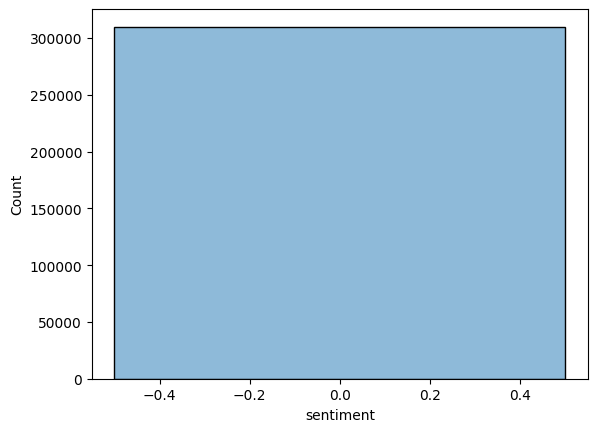

In [39]:
sns.histplot(df['sentiment'],kde=True)

<Axes: ylabel='count'>

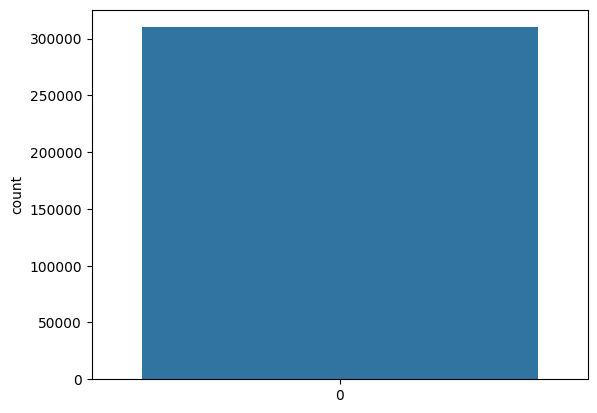

In [40]:
sns.countplot(df['sentiment'])

In [41]:
df['query'].value_counts()

NO_QUERY    309939
Name: query, dtype: int64

# dropping unnecessary columns

In [42]:
df=df.drop(columns=['query'])

In [43]:
df.head()

,sentiment,id,date,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [44]:
texts = df['text']

In [45]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)

# EDA

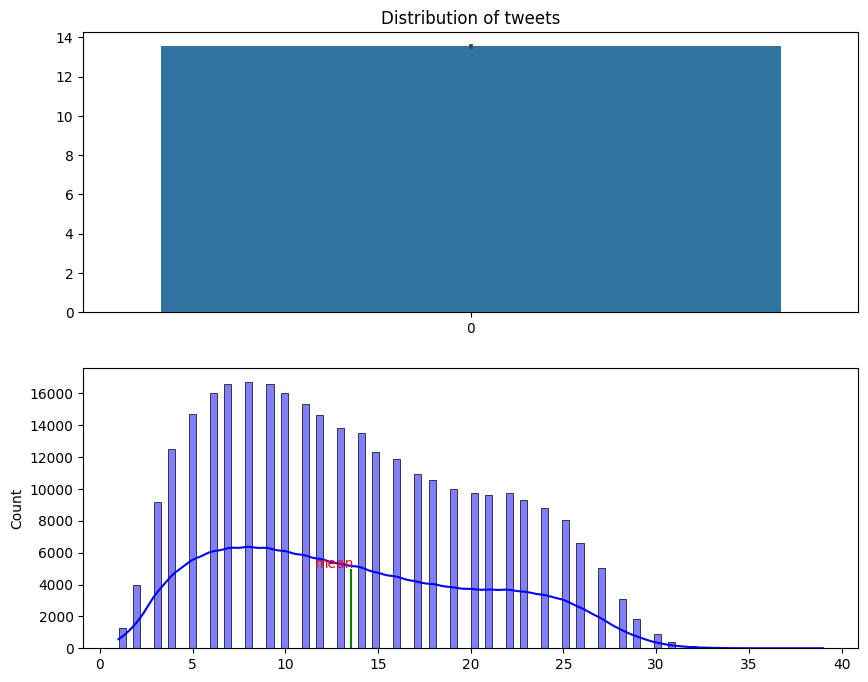

In [46]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))
axes[0].set_title('Distribution of tweets')
sns.barplot(text_lens, ax=axes[0])
sns.histplot(text_lens,bins=100, kde=True, ax=axes[1],color='blue')
axes[1].vlines(len_mean, 0, 5000, color = 'g')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),color='r')
plt.show()

In [47]:
import nltk
nltk.download('stopwords')
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

309939
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
import nltk
nltk.download('wordnet')
final_corpus = []
final_corpus_joined = []
for i in df.index:
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text  if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values

In [50]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df['sentiment'].values
data_eda.head()

,text,sentiment
0,"[upset, update, facebook, texting, might, cry,...",0
1,"[kenichan, dived, many, time, ball, managed, s...",0
2,"[whole, body, feel, itchy, like, fire]",0
3,"[nationwideclass, behaving, mad, see]",0
4,"[kwesidei, whole, crew]",0


In [51]:
positive = data_eda[data_eda['sentiment'] == 4]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['text'].tolist()

In [52]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

# Word cloud positive data

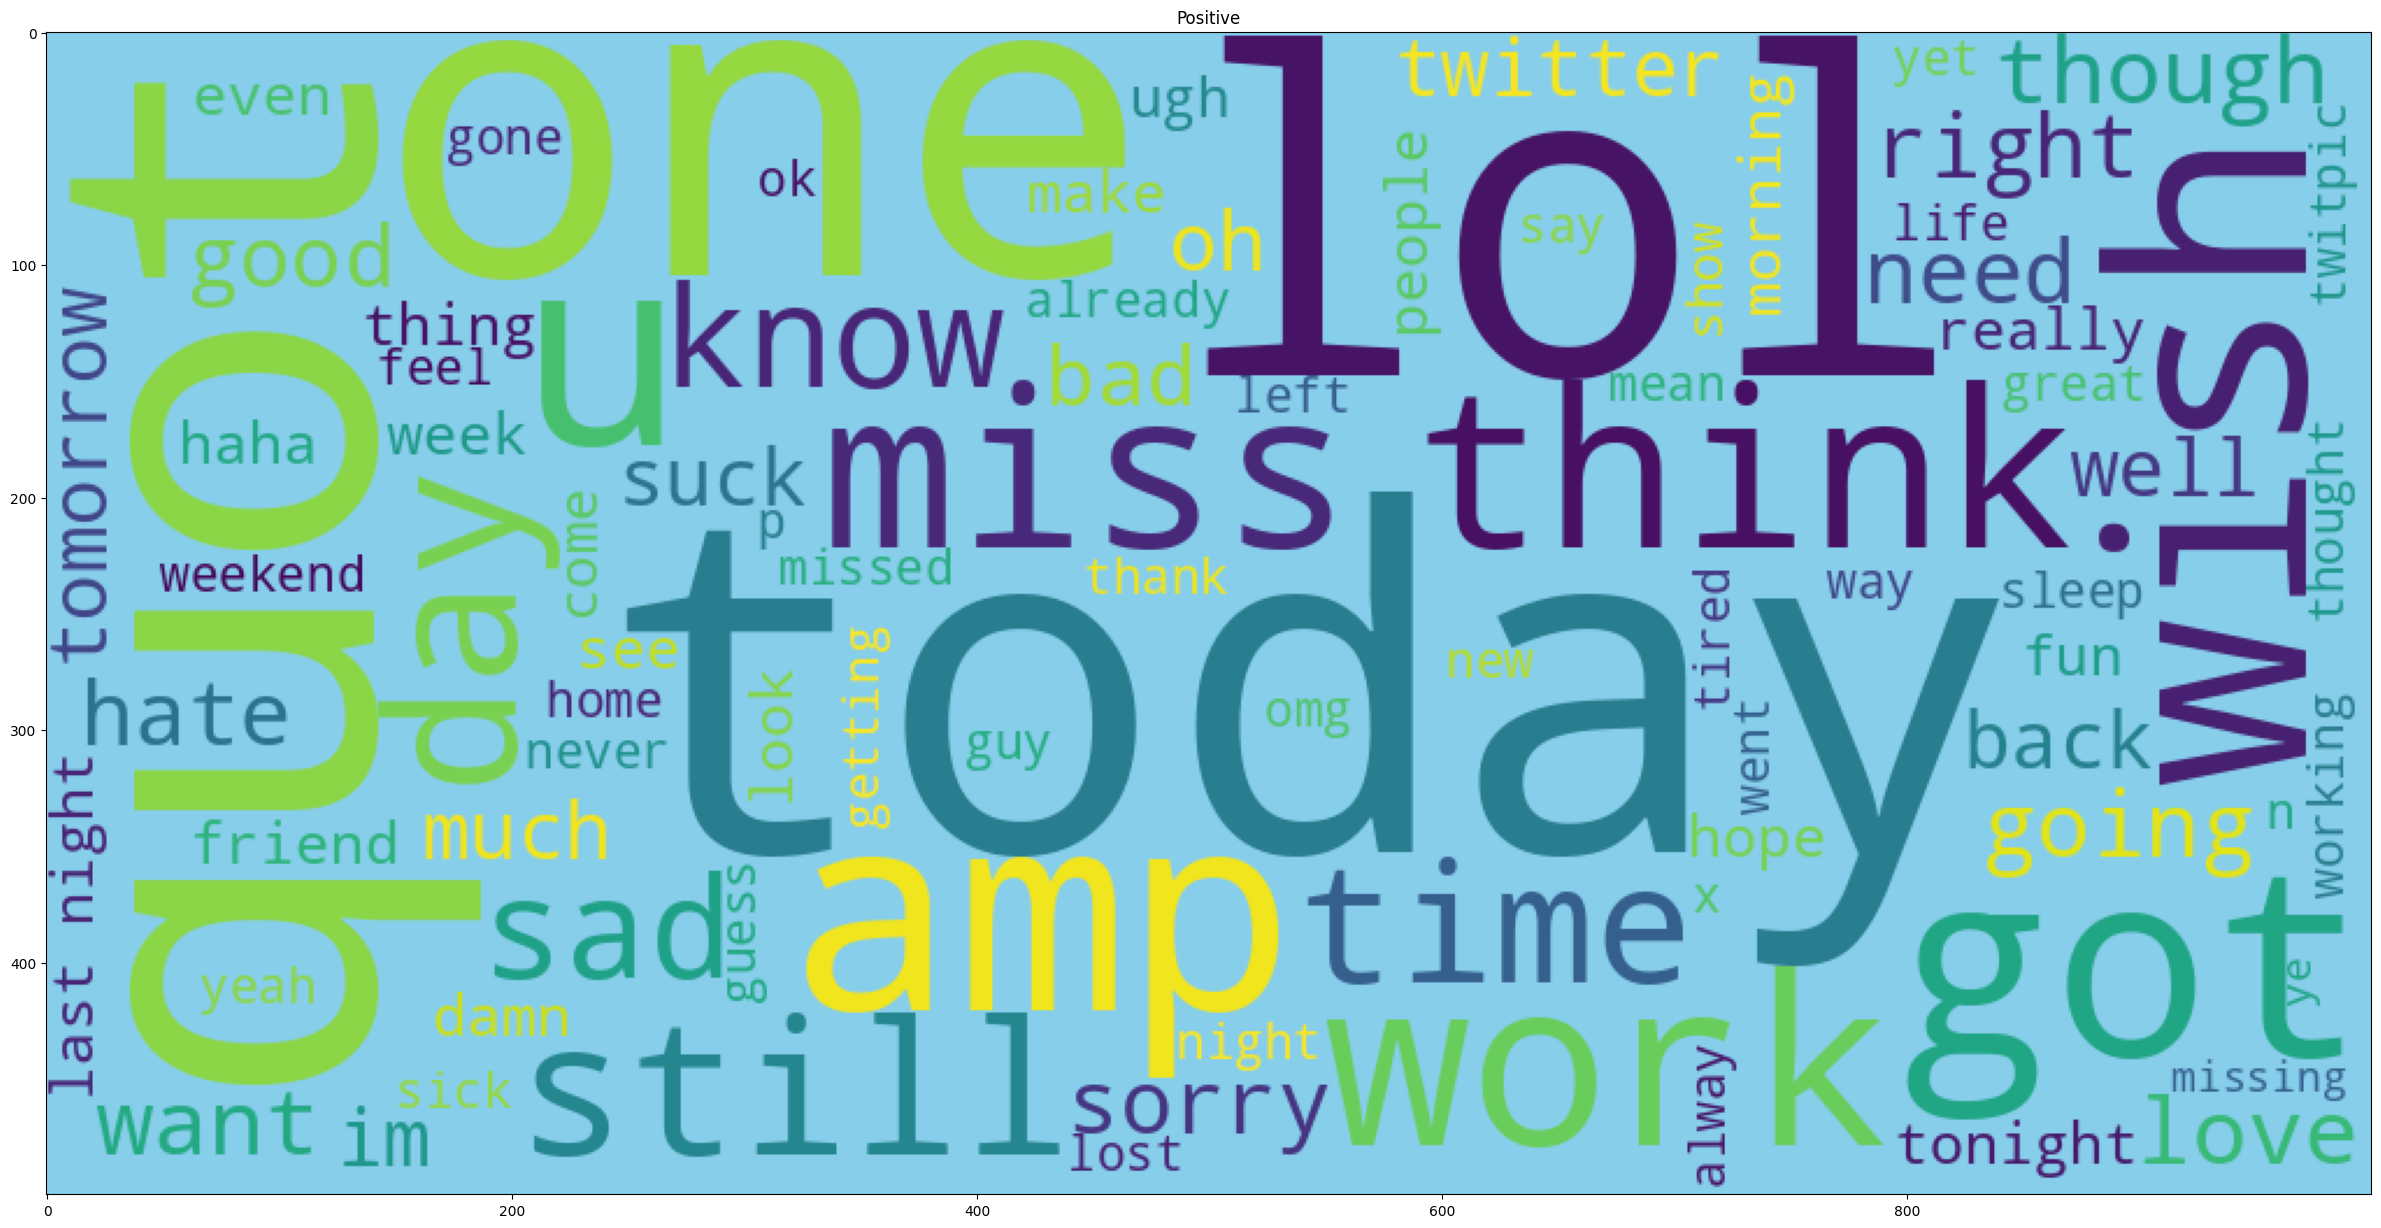

In [53]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

# Word cloud negative data

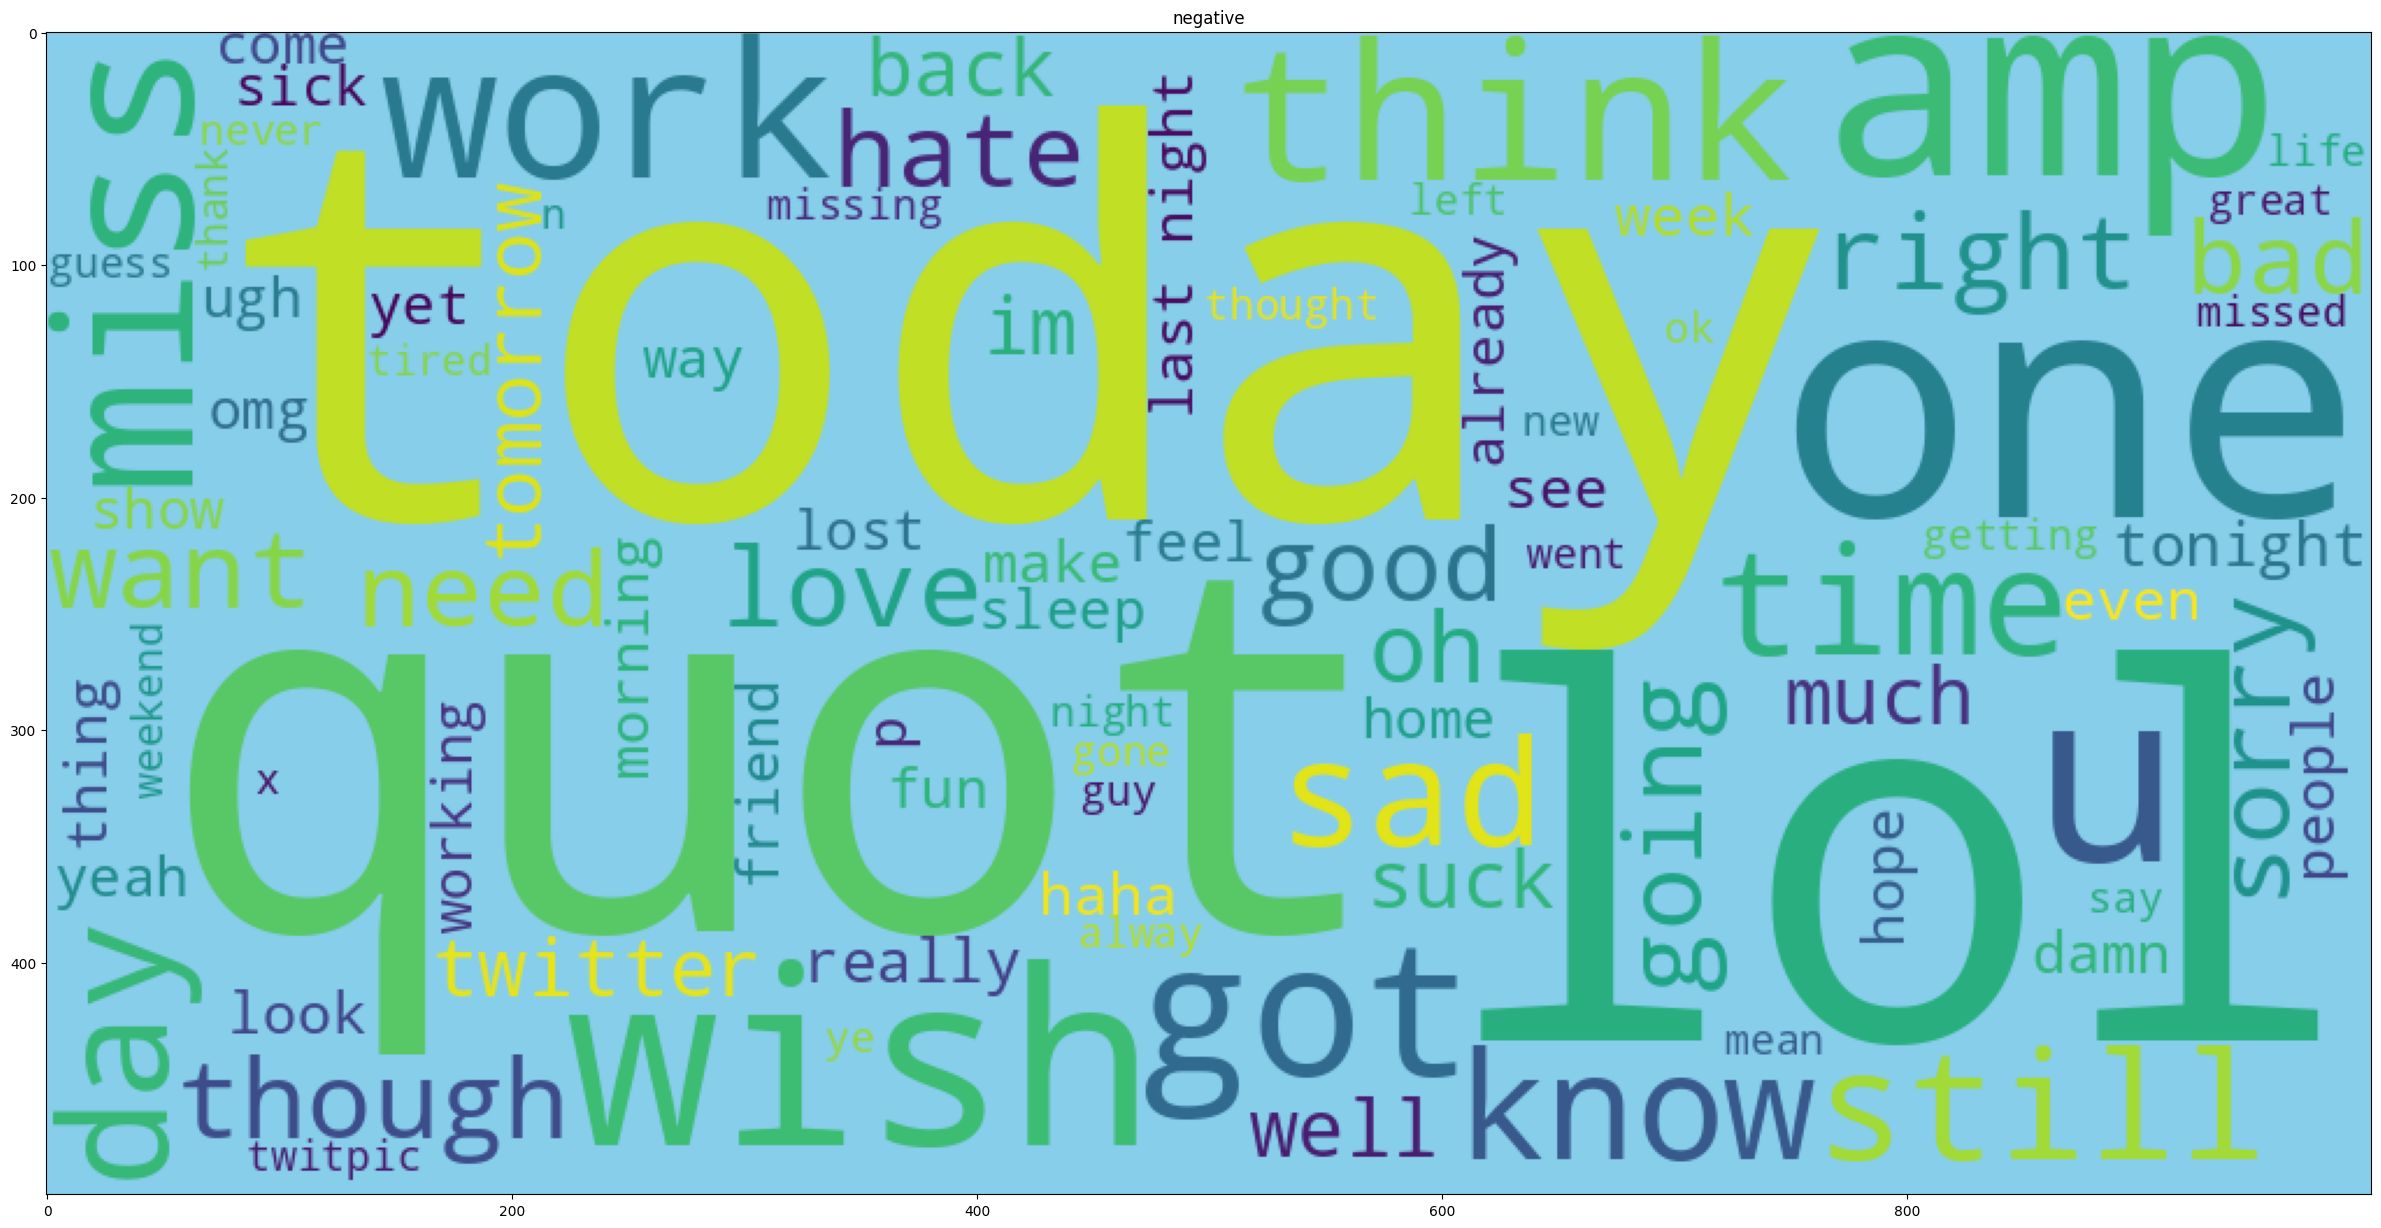

In [54]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

# TFIDF for sentiment analysis

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['sentiment']

# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

# LogisticRegression

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [60]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

ValueError: ignored

# Accuracy Score: 85% 

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score(y_train,y_train_pred)*100

85.72699464659102

                               
                                                           <-- THE END -->

